# imports

In [188]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
#import tick customization tools
import matplotlib.ticker as mticks
import matplotlib.dates as mdates
## Setting figures to timeseries-friendly
plt.rcParams['figure.figsize'] = (12,4)
plt.rcParams['figure.facecolor'] = 'white'
sns.set_context("talk", font_scale=0.9)
import holidays
import datetime as dt
from holidays import country_holidays
import os,glob

In [189]:
RAW_FILE = ("C:\\Users\\Sly\\Downloads\\Crimes_-_2001_to_Present.csv")

In [190]:
chicago_full = pd.read_csv(RAW_FILE)
chicago_full

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,11037294,JA371270,03/18/2015 12:00:00 PM,0000X W WACKER DR,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,BANK,False,False,...,42.0,32.0,11,NaN,NaN,2015,08/01/2017 03:52:26 PM,NaN,NaN,NaN
1,11646293,JC213749,12/20/2018 03:00:00 PM,023XX N LOCKWOOD AVE,1154,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT $300 AND UNDER,APARTMENT,False,False,...,36.0,19.0,11,NaN,NaN,2018,04/06/2019 04:04:43 PM,NaN,NaN,NaN
2,11645836,JC212333,05/01/2016 12:25:00 AM,055XX S ROCKWELL ST,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,NaN,False,False,...,15.0,63.0,11,NaN,NaN,2016,04/06/2019 04:04:43 PM,NaN,NaN,NaN
3,11645959,JC211511,12/20/2018 04:00:00 PM,045XX N ALBANY AVE,2820,OTHER OFFENSE,TELEPHONE THREAT,RESIDENCE,False,False,...,33.0,14.0,08A,NaN,NaN,2018,04/06/2019 04:04:43 PM,NaN,NaN,NaN
4,11645601,JC212935,06/01/2014 12:01:00 AM,087XX S SANGAMON ST,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,False,...,21.0,71.0,11,NaN,NaN,2014,04/06/2019 04:04:43 PM,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7903061,12131776,JD327752,08/10/2020 08:30:00 PM,066XX S SACRAMENTO AVE,0620,BURGLARY,UNLAWFUL ENTRY,APARTMENT,False,False,...,17.0,66.0,05,1157527.0,1860392.0,2020,08/17/2020 03:41:32 PM,41.772671,-87.698104,"(41.772671069, -87.698104059)"
7903062,12082414,JD269218,06/18/2020 09:00:00 PM,093XX S DR MARTIN LUTHER KING JR DR,0820,THEFT,$500 AND UNDER,RESIDENCE,False,False,...,9.0,49.0,06,1180558.0,1843036.0,2020,06/25/2020 03:41:40 PM,41.724546,-87.614211,"(41.724546436, -87.614210743)"
7903063,12118237,JD311791,07/27/2020 03:02:00 PM,033XX W POLK ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,True,...,24.0,27.0,08B,1154169.0,1896171.0,2020,08/03/2020 03:41:51 PM,41.870921,-87.709461,"(41.870920735, -87.709461362)"
7903064,12142591,JD340297,08/14/2020 03:00:00 PM,023XX W ROSEMONT AVE,0910,MOTOR VEHICLE THEFT,AUTOMOBILE,STREET,False,False,...,50.0,2.0,07,1159419.0,1941765.0,2020,08/26/2020 03:40:41 PM,41.995927,-87.688929,"(41.995927389, -87.688928533)"


In [191]:
# this cell can take up to 1 min to run
date_format = "%m/%d/%Y %H:%M:%S %p"

chicago_full['Datetime'] = pd.to_datetime(chicago_full['Date'], format=date_format)
chicago_full = chicago_full.sort_values('Datetime')
chicago_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7903066 entries, 2179065 to 89960
Data columns (total 23 columns):
 #   Column                Dtype         
---  ------                -----         
 0   ID                    int64         
 1   Case Number           object        
 2   Date                  object        
 3   Block                 object        
 4   IUCR                  object        
 5   Primary Type          object        
 6   Description           object        
 7   Location Description  object        
 8   Arrest                bool          
 9   Domestic              bool          
 10  Beat                  int64         
 11  District              float64       
 12  Ward                  float64       
 13  Community Area        float64       
 14  FBI Code              object        
 15  X Coordinate          float64       
 16  Y Coordinate          float64       
 17  Year                  int64         
 18  Updated On            object        
 

In [192]:
#Separate the Full Dataset by Years
chicago_full['Datetime'].dt.year

2179065    2001
1373166    2001
2154908    2001
2103527    2001
2231269    2001
           ... 
90654      2023
89895      2023
90516      2023
89751      2023
89960      2023
Name: Datetime, Length: 7903066, dtype: int64

In [193]:
# save the years for every crime
chicago_full["Year"] = chicago_full['Datetime'].dt.year.astype(str)
chicago_full["Year"].value_counts()

2002    486808
2001    485889
2003    475985
2004    469423
2005    453775
2006    448178
2007    437090
2008    427184
2009    392827
2010    370517
2011    351993
2012    336323
2013    307540
2014    275792
2016    269835
2017    269108
2018    268912
2015    264796
2019    261354
2022    238971
2020    212220
2021    208878
2023    189668
Name: Year, dtype: int64

In [194]:
## Drop unnecessary columns to reduce file size
drop_cols = ["X Coordinate","Y Coordinate", "Community Area","FBI Code",
             "Case Number","Updated On",'Block','Location','IUCR']

In [195]:
# save final df
chicago_final = chicago_full.drop(columns=drop_cols)
chicago_final = chicago_final.set_index('Datetime')

In [196]:
chicago_final.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7903066 entries, 2001-01-01 01:00:00 to 2023-09-25 12:00:00
Data columns (total 13 columns):
 #   Column                Dtype  
---  ------                -----  
 0   ID                    int64  
 1   Date                  object 
 2   Primary Type          object 
 3   Description           object 
 4   Location Description  object 
 5   Arrest                bool   
 6   Domestic              bool   
 7   Beat                  int64  
 8   District              float64
 9   Ward                  float64
 10  Year                  object 
 11  Latitude              float64
 12  Longitude             float64
dtypes: bool(2), float64(4), int64(2), object(5)
memory usage: 738.6+ MB


In [197]:
os.environ["HOME"] = 'C:\\Users\\Sly\\'

In [198]:
## SET THE FOLDER FOR FINAL FILES
OUTPUT_FOLDER = 'Data/Chicago/'
os.makedirs(OUTPUT_FOLDER, exist_ok=True)

In [199]:
## Run the cell below to attempt to programmatically find your crime file
import os,glob

## Getting the home folder from environment variables
home_folder = os.environ['HOME']
# print("- Your Home Folder is: " + home_folder)

## Check for downloads folder
if 'Downloads' in os.listdir(home_folder):
    
    
    # Print the Downloads folder path
    dl_folder = os.path.abspath(os.path.join(home_folder,'Downloads'))
    print(f"- Your Downloads folder is '{dl_folder}/'\n")
    
    ## checking for crime files using glob
    crime_files = sorted(glob.glob(dl_folder+'/**/Crimes_-_2001_to_Present*',recursive=True))
    
    # If more than 
    if len(crime_files)==1:
        RAW_FILE = crime_files[0]
        
    elif len(crime_files)>1:
        print('[i] The following files were found:')
        
        for i, fname in enumerate(crime_files):
            print(f"\tcrime_files[{i}] = '{fname}'")
        print(f'\n- Please fill in the RAW_FILE variable in the code cell below with the correct filepath.')

else:
    print(f'[!] Could not programmatically find your downloads folder.')
    print('- Try using Finder (on Mac) or File Explorer (Windows) to navigate to your Downloads folder.')

- Your Downloads folder is 'C:\Users\Sly\Downloads/'



In [200]:
# unique # of year bins
year_bins = chicago_final['Year'].astype(str).unique()
year_bins

array(['2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008',
       '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016',
       '2017', '2018', '2019', '2020', '2021', '2022', '2023'],
      dtype=object)

In [201]:
FINAL_DROP = ['Year']

In [202]:
## set save location 

os.makedirs(OUTPUT_FOLDER, exist_ok=True)
print(f"[i] Saving .csv's to {OUTPUT_FOLDER}")
## loop through years
for year in year_bins:
    
    ## save temp slices of dfs to save.
    temp_df = chicago_final.loc[year]
    temp_df = temp_df.sort_index()
    temp_df = temp_df.reset_index(drop=True)
    temp_df = temp_df.drop(columns=FINAL_DROP)

    # save as csv to output folder
    fname_temp = f"{OUTPUT_FOLDER}Chicago-Crime_{year}.csv"#.gz
    temp_df.to_csv(fname_temp,index=False)

    print(f"- Succesfully saved {fname_temp}")

[i] Saving .csv's to Data/Chicago/
- Succesfully saved Data/Chicago/Chicago-Crime_2001.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2002.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2003.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2004.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2005.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2006.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2007.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2008.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2009.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2010.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2011.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2012.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2013.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2014.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2015.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2016.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2017.csv
- Succesfully

In [203]:
## create a README.txt for the zip files
readme = """Source URL: 
- https://data.cityofchicago.org/Public-Safety/Crimes-2001-to-Present/ijzp-q8t2
- Filtered for years 2000-Present.

Downloaded 07/18/2022
- Files are split into 1 year per file.

EXAMPLE USAGE:
>> import glob
>> import pandas as pd
>> folder = "Data/Chicago/"
>> crime_files = sorted(glob.glob(folder+"*.csv"))
>> df = pd.concat([pd.read_csv(f) for f in crime_files])
"""
print(readme)


with open(f"{OUTPUT_FOLDER}README.txt",'w') as f:
    f.write(readme)

Source URL: 
- https://data.cityofchicago.org/Public-Safety/Crimes-2001-to-Present/ijzp-q8t2
- Filtered for years 2000-Present.

Downloaded 07/18/2022
- Files are split into 1 year per file.

EXAMPLE USAGE:
>> import glob
>> import pandas as pd
>> folder = "Data/Chicago/"
>> crime_files = sorted(glob.glob(folder+"*.csv"))
>> df = pd.concat([pd.read_csv(f) for f in crime_files])



In [204]:
# get list of files from folder
crime_files = sorted(glob.glob(OUTPUT_FOLDER+"*.csv"))
df = pd.concat([pd.read_csv(f) for f in crime_files])
df

,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude
0,1427622,01/01/2001 01:00:00 PM,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,False,2521,25.0,NaN,41.929707,-87.739828
1,5462733,01/01/2001 01:00:00 AM,OFFENSE INVOLVING CHILDREN,AGG CRIM SEX ABUSE FAM MEMBER,RESIDENCE,False,True,233,2.0,20.0,41.789084,-87.620849
2,1325760,01/01/2001 01:00:00 PM,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,GOVERNMENT BUILDING/PROPERTY,True,False,1033,10.0,NaN,NaN,NaN
3,1317937,01/01/2001 01:00:00 AM,BATTERY,SIMPLE,RESIDENCE PORCH/HALLWAY,False,False,334,3.0,NaN,41.762514,-87.565877
4,1324743,01/01/2001 01:00:00 PM,GAMBLING,ILLEGAL ILL LOTTERY,STREET,True,False,313,3.0,NaN,41.780412,-87.611970
...,...,...,...,...,...,...,...,...,...,...,...,...
189663,13222613,09/25/2023 12:00:00 AM,MOTOR VEHICLE THEFT,AUTOMOBILE,STREET,False,False,912,9.0,12.0,41.827898,-87.669112
189664,13222192,09/25/2023 12:00:00 AM,PUBLIC PEACE VIOLATION,BOMB THREAT,OTHER COMMERCIAL TRANSPORTATION,False,False,1651,16.0,41.0,41.979006,-87.906463
189665,13226587,09/25/2023 12:00:00 AM,DECEPTIVE PRACTICE,CREDIT CARD FRAUD,STREET,False,False,815,8.0,14.0,41.812670,-87.726211
189666,13222804,09/25/2023 12:00:00 AM,THEFT,RETAIL THEFT,SMALL RETAIL STORE,True,False,1932,19.0,32.0,41.937029,-87.664974


In [205]:
years = df['Date'].map(lambda x: x.split()[0].split('/')[-1])
years.value_counts().sort_index()

2001    485889
2002    486808
2003    475985
2004    469423
2005    453775
2006    448178
2007    437090
2008    427184
2009    392827
2010    370517
2011    351993
2012    336323
2013    307540
2014    275792
2015    264796
2016    269835
2017    269108
2018    268912
2019    261354
2020    212220
2021    208878
2022    238971
2023    189668
Name: Date, dtype: int64

# Question 1: Which district in chicago has the most crimes? Which district has the least?

In [206]:
#Group district and primary type
districts_by_crime = df.groupby('District')['Primary Type'].value_counts().sort_index()
df_districts = districts_by_crime.to_frame('# of Crimes').reset_index()
df_districts

,District,Primary Type,# of Crimes
0,1.0,ARSON,126
1,1.0,ASSAULT,15196
2,1.0,BATTERY,34025
3,1.0,BURGLARY,5359
4,1.0,CONCEALED CARRY LICENSE VIOLATION,22
...,...,...,...
750,31.0,PUBLIC PEACE VIOLATION,1
751,31.0,ROBBERY,2
752,31.0,SEX OFFENSE,4
753,31.0,STALKING,1


In [207]:
#Aggregate crimes by district
plot_df = df_districts.groupby('District').agg({'# of Crimes':'sum'}).reset_index()
plot_df

,District,# of Crimes
0,1.0,321207
1,2.0,374778
2,3.0,400731
3,4.0,448616
4,5.0,349747
5,6.0,462203
6,7.0,455337
7,8.0,530728
8,9.0,385686
9,10.0,340472


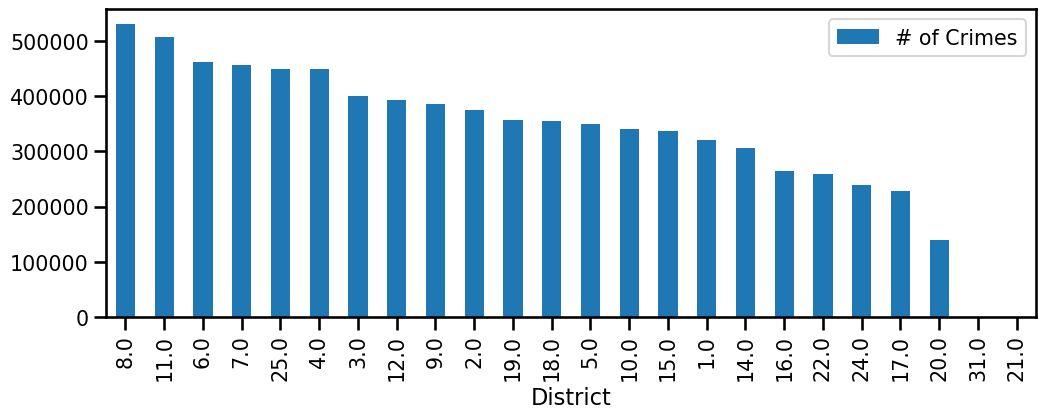

In [208]:
#Plot data
ax = plot_df.sort_values(by = '# of Crimes', 
                         ascending = False).plot(kind = 'bar', 
                                                 x = 'District', y = '# of Crimes');

    District 8 displays the most amount of crime at over 1/2 a million cases. 
    
    The district that has the least, featuring little to no crime in comparison is District 21

# Question 2: 
Which holidays reveal an increase in the number of crimes and are there any holidays that provide a decrease in the number of crimes 

In [209]:
## Create an instance of the US country holidays.
us_holidays = country_holidays('US')
us_holidays

holidays.country_holidays('US')

In [210]:
## making a date range that covers full dataset
all_days = pd.date_range(df["Date"].min(), df["Date"].max())
all_days

DatetimeIndex(['2001-01-01 01:00:00', '2001-01-02 01:00:00',
               '2001-01-03 01:00:00', '2001-01-04 01:00:00',
               '2001-01-05 01:00:00', '2001-01-06 01:00:00',
               '2001-01-07 01:00:00', '2001-01-08 01:00:00',
               '2001-01-09 01:00:00', '2001-01-10 01:00:00',
               ...
               '2022-12-22 01:00:00', '2022-12-23 01:00:00',
               '2022-12-24 01:00:00', '2022-12-25 01:00:00',
               '2022-12-26 01:00:00', '2022-12-27 01:00:00',
               '2022-12-28 01:00:00', '2022-12-29 01:00:00',
               '2022-12-30 01:00:00', '2022-12-31 01:00:00'],
              dtype='datetime64[ns]', length=8035, freq='D')

In [211]:
## Testing data
print(all_days[358])
us_holidays.get(all_days[358])

2001-12-25 01:00:00


'Christmas Day'

In [212]:
## Saving both holiday types as columns
df["US Holiday"] = [us_holidays.get(day) for day in df['Date']]
df.tail()

,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude,US Holiday
189663,13222613,09/25/2023 12:00:00 AM,MOTOR VEHICLE THEFT,AUTOMOBILE,STREET,False,False,912,9.0,12.0,41.827898,-87.669112,None
189664,13222192,09/25/2023 12:00:00 AM,PUBLIC PEACE VIOLATION,BOMB THREAT,OTHER COMMERCIAL TRANSPORTATION,False,False,1651,16.0,41.0,41.979006,-87.906463,None
189665,13226587,09/25/2023 12:00:00 AM,DECEPTIVE PRACTICE,CREDIT CARD FRAUD,STREET,False,False,815,8.0,14.0,41.812670,-87.726211,None
189666,13222804,09/25/2023 12:00:00 AM,THEFT,RETAIL THEFT,SMALL RETAIL STORE,True,False,1932,19.0,32.0,41.937029,-87.664974,None
189667,13222167,09/25/2023 12:00:00 AM,THEFT,$500 AND UNDER,STREET,False,False,2512,25.0,36.0,41.917874,-87.778257,None


In [213]:
## US Holidays
df['US Holiday'].value_counts()

New Year's Day                                     33732
Independence Day                                   23495
Labor Day                                          22903
Memorial Day                                       21867
Columbus Day                                       20920
Veterans Day                                       20418
Martin Luther King Jr. Day                         18595
Washington's Birthday                              18231
Thanksgiving                                       14797
Christmas Day                                      12418
Independence Day (Observed)                         5884
Veterans Day (Observed)                             5842
New Year's Day (Observed)                           5528
Christmas Day (Observed)                            4929
Juneteenth National Independence Day                2181
Juneteenth National Independence Day (Observed)     1403
Name: US Holiday, dtype: int64

    among holidays in the US, New Year's Day had the most amount of crimes committed on it; and Juneteenth National Independence Day (Observed) interestingly showed the least amount of crime committed on it for various reasons

# Question 3: Comparing Months:
## What months have the most crime and which have the least?

## Do any individual crimes not follow this pattern? If so, which crimes?

In [214]:
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y %I:%M:%S %p')
df = df.set_index('Date')
df.head()

,ID,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude,US Holiday
Date,,,,,,,,,,,,
2001-01-01 13:00:00,1427622,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,False,2521,25.0,NaN,41.929707,-87.739828,New Year's Day
2001-01-01 01:00:00,5462733,OFFENSE INVOLVING CHILDREN,AGG CRIM SEX ABUSE FAM MEMBER,RESIDENCE,False,True,233,2.0,20.0,41.789084,-87.620849,New Year's Day
2001-01-01 13:00:00,1325760,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,GOVERNMENT BUILDING/PROPERTY,True,False,1033,10.0,NaN,NaN,NaN,New Year's Day
2001-01-01 01:00:00,1317937,BATTERY,SIMPLE,RESIDENCE PORCH/HALLWAY,False,False,334,3.0,NaN,41.762514,-87.565877,New Year's Day
2001-01-01 13:00:00,1324743,GAMBLING,ILLEGAL ILL LOTTERY,STREET,True,False,313,3.0,NaN,41.780412,-87.611970,New Year's Day


In [215]:
#Feature engineering year and month columns
df['Year'] = df.index.year
df['Month'] = df.index.month
df['Month Name'] = df.index.month_name()
df.head()

,ID,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude,US Holiday,Year,Month,Month Name
Date,,,,,,,,,,,,,,,
2001-01-01 13:00:00,1427622,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,False,2521,25.0,NaN,41.929707,-87.739828,New Year's Day,2001,1,January
2001-01-01 01:00:00,5462733,OFFENSE INVOLVING CHILDREN,AGG CRIM SEX ABUSE FAM MEMBER,RESIDENCE,False,True,233,2.0,20.0,41.789084,-87.620849,New Year's Day,2001,1,January
2001-01-01 13:00:00,1325760,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,GOVERNMENT BUILDING/PROPERTY,True,False,1033,10.0,NaN,NaN,NaN,New Year's Day,2001,1,January
2001-01-01 01:00:00,1317937,BATTERY,SIMPLE,RESIDENCE PORCH/HALLWAY,False,False,334,3.0,NaN,41.762514,-87.565877,New Year's Day,2001,1,January
2001-01-01 13:00:00,1324743,GAMBLING,ILLEGAL ILL LOTTERY,STREET,True,False,313,3.0,NaN,41.780412,-87.611970,New Year's Day,2001,1,January


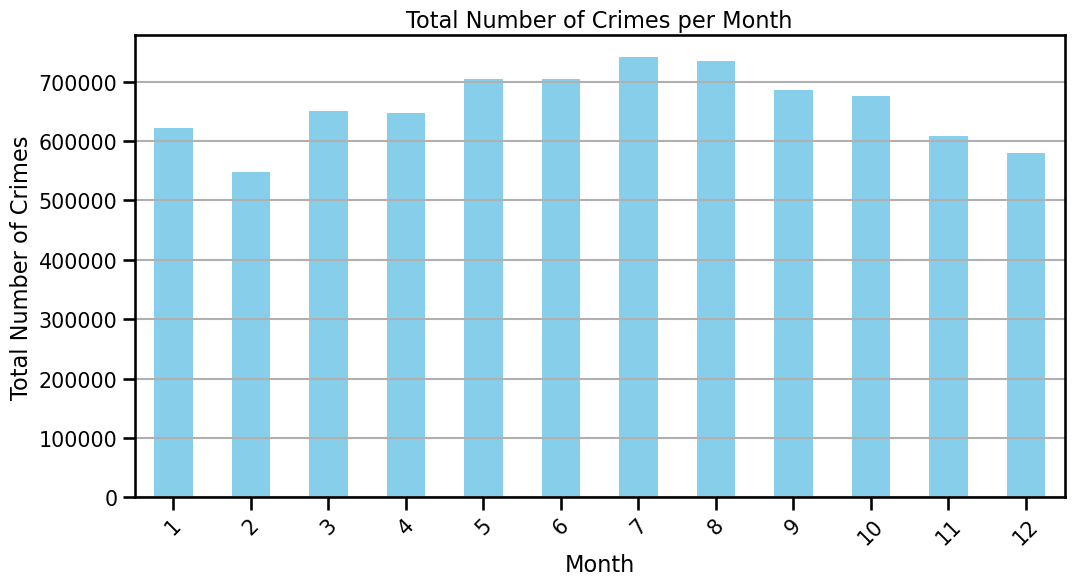

In [216]:
monthly_crime=df.groupby('Month').size()
plt.figure(figsize=(12, 6))
monthly_crime.plot(kind='bar', color='skyblue')
plt.xlabel('Month')
plt.ylabel('Total Number of Crimes')
plt.title('Total Number of Crimes per Month')
plt.xticks(rotation=45)
plt.grid(axis='y')

In [217]:
crime_by_month=df.groupby('Primary Type')['Month'].value_counts().sort_index()
plot_month = crime_by_month.to_frame('# of Crimes').reset_index()

c:\Users\Sly\anaconda3\envs\dojo-env\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


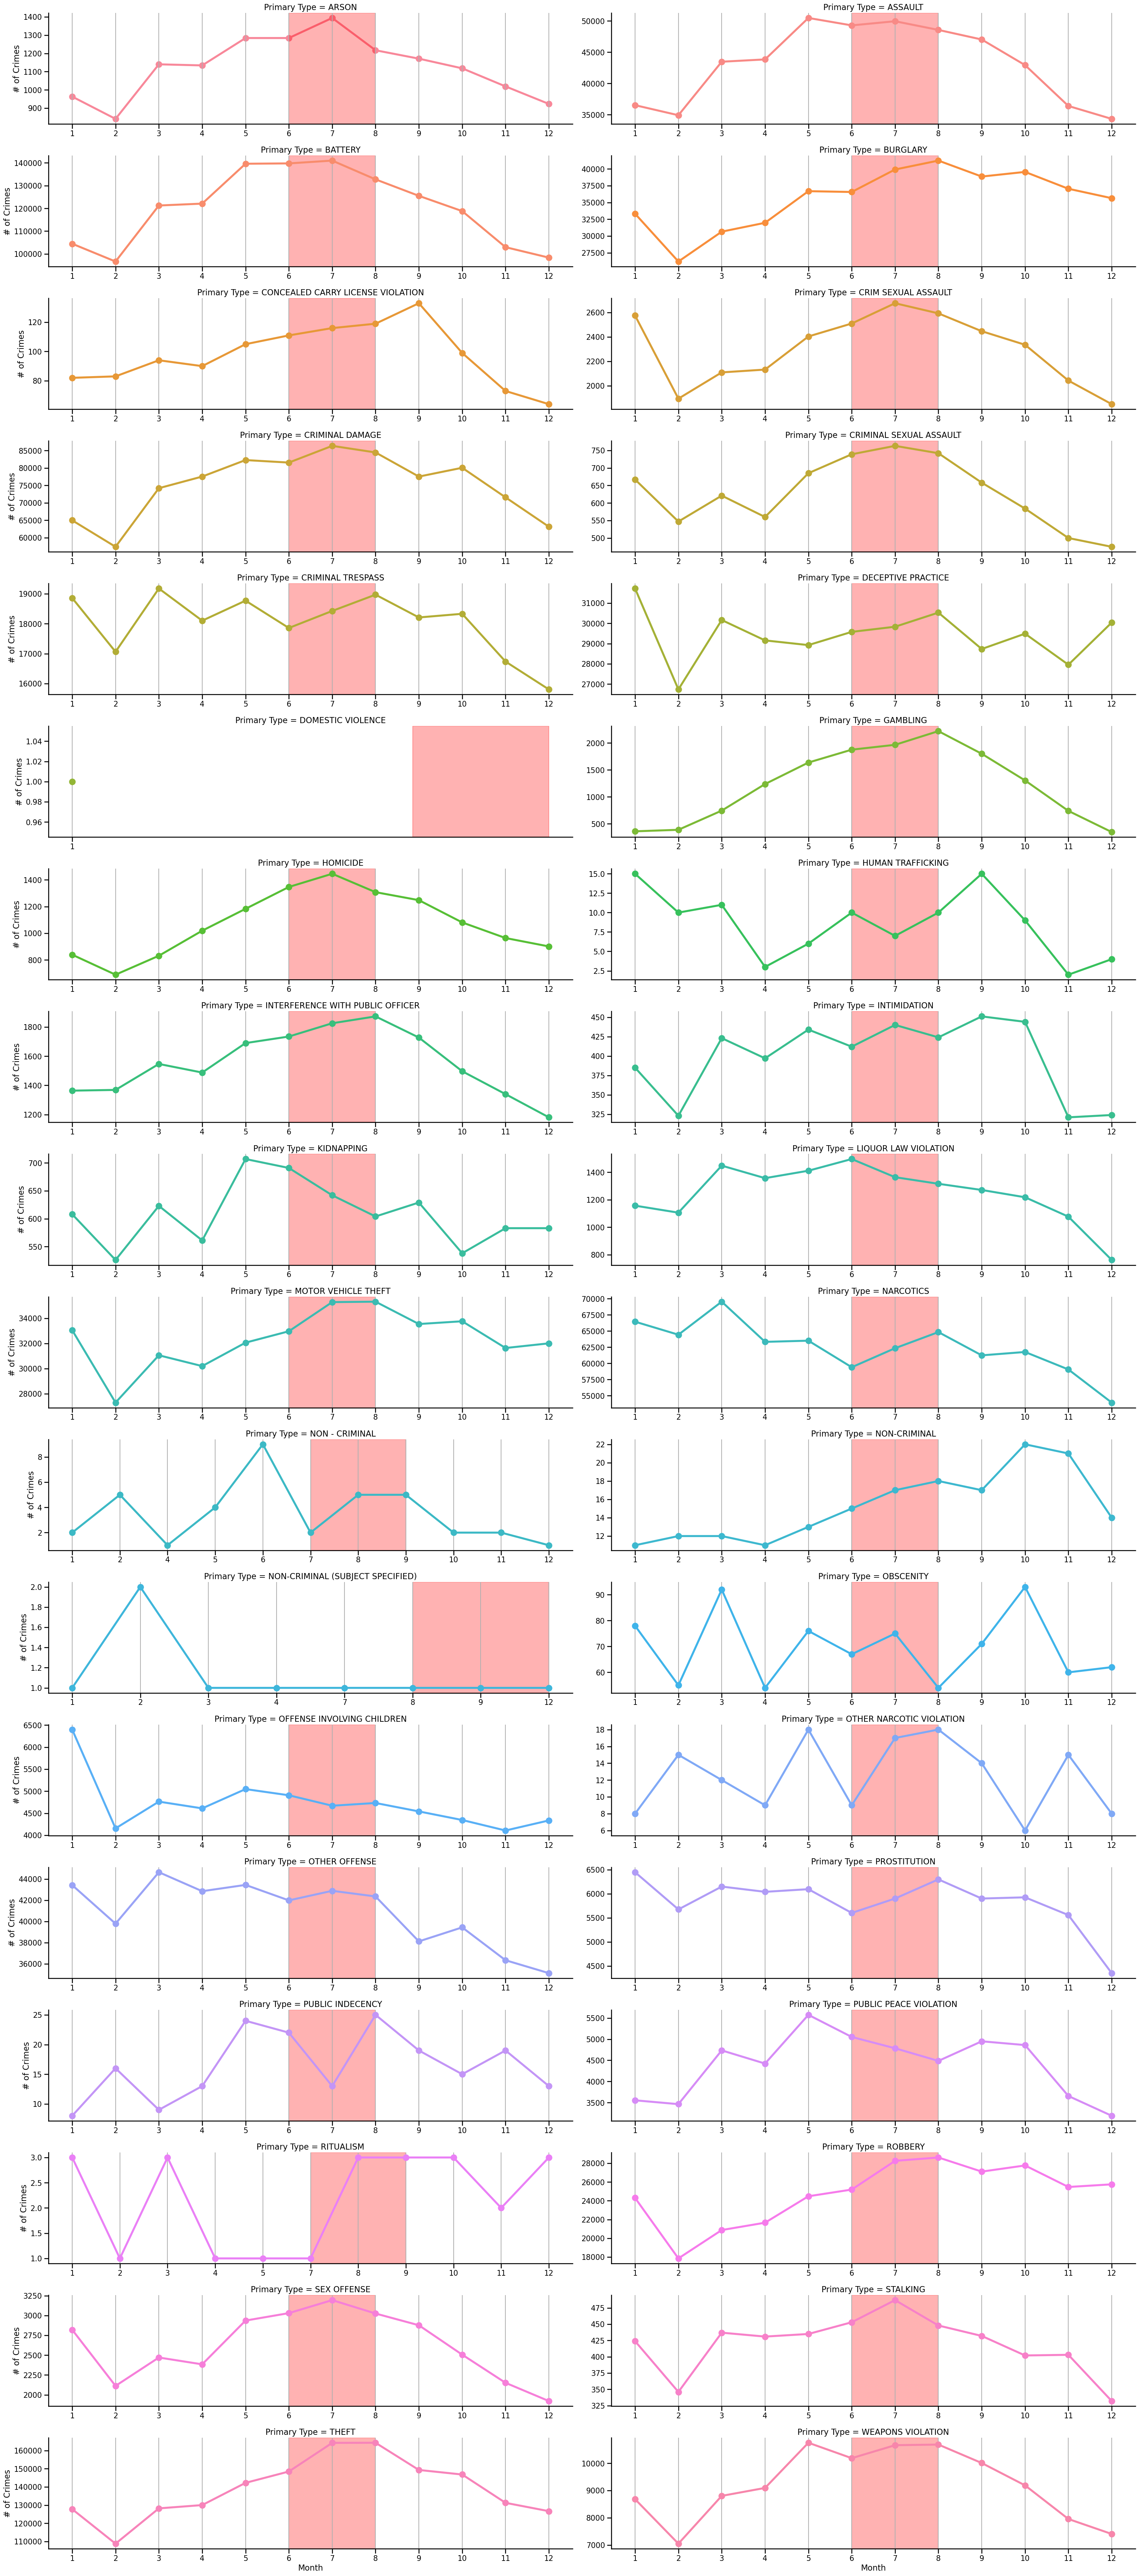

In [218]:
g = sns.catplot(data=plot_month, x='Month', y='# of Crimes',
                hue='Primary Type', col='Primary Type',col_wrap=2,
            aspect=4, height=4,
            kind='point',sharey=False,sharex=False);
for ax in g.axes:
    ax.axvspan(5, 7, color='red', alpha=0.3)
[ax.grid(axis='x') for ax in g.axes];

    The 3 months with the most crime are July, August, and June in that order
    
    Only a small handful of exceptions don't follow the trend of peak time for crime and these crimes are public peace violations, offenses involving children, liquor law violations, human trafficking, and kidnapping